In [7]:
# Import Libary
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)

# read data
data=pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [12]:
# Declare dependent variable(Y) and independent variable(X)

X=data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [13]:
np.corrcoef(X, Y)

array([[1.        , 0.79956971],
       [0.79956971, 1.        ]])

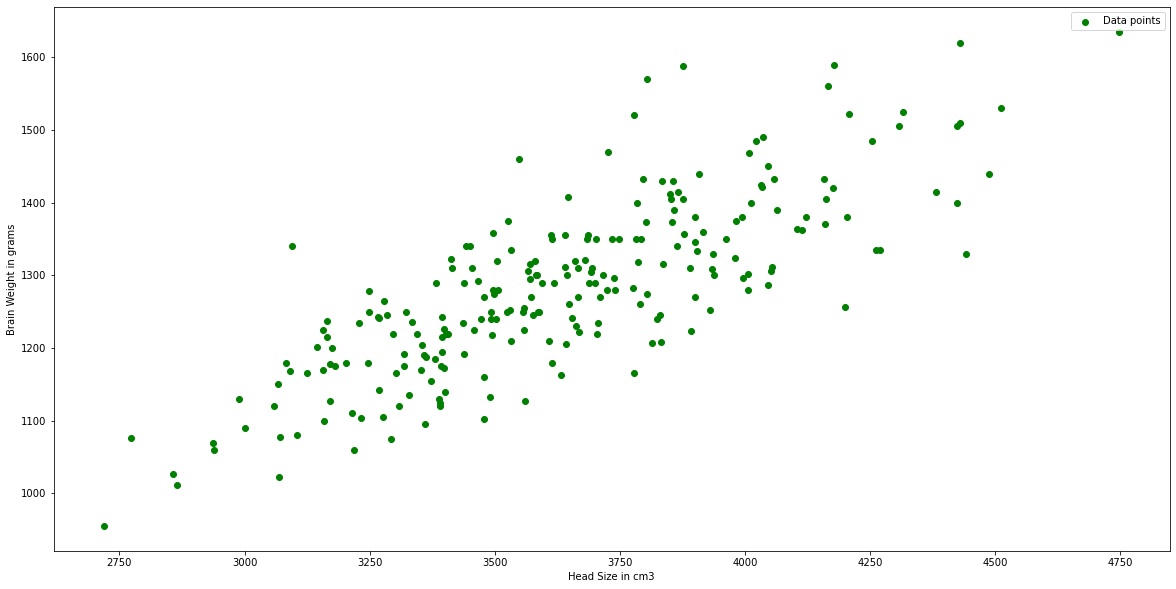

In [14]:
# Plot the Input Data
plt.scatter(X, Y, c='green', label='Data points')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [15]:
# Calculating coefficient

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)

# Using the formula to calculate theta1 and theta2
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Printing coefficients
print("coefficients for regression",b1, b0)

coefficients for regression 0.26342933948939945 325.57342104944223


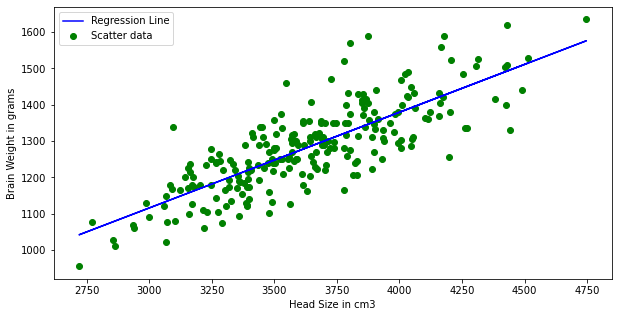

In [16]:
# Plotting Values and Regression Line
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 5.0)
# max_x = np.max(X) + 100
# min_x = np.min(X) - 100

y = b0 + b1 * X

# Ploting Line
plt.plot(X, y, color='blue', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='green', label='Scatter data')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [17]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print("Root Mean Square Error is",rmse)

Root Mean Square Error is 72.1206213783709


In [18]:
# Calculating R2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print("R2 Score",r2)

R2 Score 0.6393117199570003


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((n, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)
 
# Calculating R2 Score
r2_score = reg.score(X, Y)
 
print(r2_score)

0.639311719957
